<img src="mioti.png" style="height: 100px">
<center style="color:#888">Data Science with Python</center>

# DSPy6 Pandas IoT I. Challenge. 

<img src="madrid_central.png" style="width: 600px">


Vamos a practicar series temporales con los [datos del "Sistema Integral de la Calidad del Aire del Ayuntamiento de Madrid"](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=f3c0f7d512273410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default) que publica su portal de datos abiertos.

El objetivo de la práctica es ver cómo varió la presencia de dióxido de nitrógeno (NO2) en las mediciones realizadas por una estación de calidad del aire de dentro de Madrid Central, en torno a la fecha en que se activó por primera vez la restricción. **¿Disminuyó la concentracion de NO2 en el aire tras la aplicación de Madrid Central?**



## Inicialización

La siguiente celda importa geopandas y mplleaflet y en el caso de que no esten instaldos lo hará. **Teneis que descomentar las siguientes líneas:** 

In [1]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# import sys
# try: 
#     import geopandas as gpd
#     from shapely.geometry import Point
# except:
#     !conda install --yes --prefix {sys.prefix} geopandas
# try:
#     import mplleaflet
# except:
#     !conda install -c conda-forge --yes --prefix {sys.prefix} mplleaflet

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 9)
from pathlib import Path
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sb

rcParams.update({'font.size': 14})

## Pasos

### Carga de los datos

Madrid Central entró en vigor el **30 de noviembre de 2018**. Desafortunadamente, los datos vienen en este caso en CSV por mes. **Lee todos los CSVs de 2018, 2019 y 2020 y juntalos en un único dataframe.**


In [3]:
air_q = pd.DataFrame()
lista_ficheros=[]
for csv_file in Path('.').glob('Anio*/*.csv'):
    # ToDo: rellenad esto con el código necesario para leer!
    lista_ficheros.append(pd.read_csv(csv_file,sep=';'))
    print(csv_file)


Anio201810\abr_mo18.csv
Anio201810\ago_mo18.csv
Anio201810\dic_mo18.csv
Anio201810\ene_mo18.csv
Anio201810\feb_mo18.csv
Anio201810\jul_mo18.csv
Anio201810\jun_mo18.csv
Anio201810\mar_mo18.csv
Anio201810\may_mo18.csv
Anio201810\nov_mo18.csv
Anio201810\oct_mo18.csv
Anio201810\sep_mo18.csv
Anio201912\abr_mo19.csv
Anio201912\ago_mo19.csv
Anio201912\dic_mo19.csv
Anio201912\ene_mo19.csv
Anio201912\feb_mo19.csv
Anio201912\jul_mo19.csv
Anio201912\jun_mo19.csv
Anio201912\mar_mo19.csv
Anio201912\may_mo19.csv
Anio201912\nov_mo19.csv
Anio201912\oct_mo19.csv
Anio201912\sep_mo19.csv
Anio202009\abr_mo20.csv
Anio202009\ago_mo20.csv
Anio202009\ene_mo20.csv
Anio202009\feb_mo20.csv
Anio202009\jul_mo20.csv
Anio202009\jun_mo20.csv
Anio202009\mar_mo20.csv
Anio202009\may_mo20.csv
Anio202009\sep_mo20.csv


In [4]:
#Concatenamos todos los ficheros para hacer un dataframe único. Y resetamos el indice para que tengan uno común.
air_q = pd.concat(lista_ficheros).reset_index(drop=True)
air_q

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,4,1,28079004_1_38,2018,4,1,2.00,V,...,2.00,V,2.00,V,3.00,V,4.00,V,3.00,V
1,28,79,4,1,28079004_1_38,2018,4,2,2.00,V,...,2.00,V,2.00,V,2.00,V,2.00,V,2.00,V
2,28,79,4,1,28079004_1_38,2018,4,3,2.00,V,...,2.00,V,2.00,V,2.00,V,2.00,V,2.00,V
3,28,79,4,1,28079004_1_38,2018,4,4,2.00,V,...,2.00,V,2.00,V,2.00,V,2.00,V,2.00,V
4,28,79,4,1,28079004_1_38,2018,4,5,2.00,V,...,2.00,V,2.00,V,4.00,V,5.00,V,4.00,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151265,28,79,60,14,28079060_14_6,2020,9,26,63.31,V,...,74.69,V,68.08,V,65.12,V,63.61,V,61.34,V
151266,28,79,60,14,28079060_14_6,2020,9,27,61.82,V,...,78.70,V,73.47,V,72.61,N,59.40,N,60.88,V
151267,28,79,60,14,28079060_14_6,2020,9,28,63.40,V,...,74.10,V,35.61,N,9.94,N,6.87,N,12.84,N
151268,28,79,60,14,28079060_14_6,2020,9,29,19.41,N,...,68.28,V,28.01,V,22.89,V,10.15,V,11.66,V


In [5]:
air_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151270 entries, 0 to 151269
Data columns (total 56 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PROVINCIA       151270 non-null  int64  
 1   MUNICIPIO       151270 non-null  int64  
 2   ESTACION        151270 non-null  int64  
 3   MAGNITUD        151270 non-null  int64  
 4   PUNTO_MUESTREO  151270 non-null  object 
 5   ANO             151270 non-null  int64  
 6   MES             151270 non-null  int64  
 7   DIA             151270 non-null  int64  
 8   H01             151270 non-null  float64
 9   V01             151270 non-null  object 
 10  H02             151270 non-null  float64
 11  V02             151270 non-null  object 
 12  H03             151270 non-null  float64
 13  V03             151270 non-null  object 
 14  H04             151270 non-null  float64
 15  V04             151270 non-null  object 
 16  H05             151270 non-null  float64
 17  V05       

El datafreme una vez completado lo anterior, tiene esta pinta: 
<img src="dataset.png" style="width: 800px">

### Filtrado

El siguiente plot muestra sobre un mapa la zona a la que aplica Madrid Central, junto con las estaciones de medición de calidad del aire:

In [6]:
# import os
# os.environ["PROJ_LIB"]= 'C:/Users/JPAS/Anaconda3/Library/share'

gdf = gpd.read_file("Madrid_Central/Madrid_Central.shp")
gdf = gdf.to_crs(epsg=3857)
est = pd.read_csv('estaciones.csv', delimiter=';', encoding='latin-1', decimal='.')
gdf_est = gpd.GeoDataFrame(
    est, 
    geometry=[Point(x, y) for x, y in zip(est.LONGITUD, est.LATITUD)]
)
gdf_est.crs = {'init' :'epsg:4326'}
gdf_est = gdf_est.to_crs(epsg=3857)
import mplleaflet
ax = gdf.plot(facecolor='grey', edgecolor='black')
gdf_est.plot(ax=ax, marker='+', color='black', markersize=300.0)
mplleaflet.display(fig=ax.figure, crs=gdf.crs)


# gdf = gpd.read_file("Madrid_Central/Madrid_Central.shp")
# gdf.crs = {'init' :'epsg:25830'}
# #gdf = gdf.to_crs(epsg=3857)
# est = pd.read_csv('estaciones.csv', delimiter=';', encoding='latin-1', decimal='.')
# gdf_est = gpd.GeoDataFrame(
#     est,
#     geometry=[Point(x, y) for x, y in zip(est.LONGITUD, est.LATITUD)]
# )
# gdf_est.crs = {'init' :'epsg:4326'}
# gdf_est = gdf_est.to_crs(epsg=3857)
# import mplleaflet
# ax = gdf.plot(facecolor='grey', edgecolor='black')
# gdf_est.plot(ax=ax, marker='+', color='black', markersize=300.0)
# mplleaflet.display(fig=ax.figure, crs=gdf.crs)


C:\Users\JPAS\Anaconda3\lib\site-packages\mplleaflet\mplexporter\exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
C:\Users\JPAS\Anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


La única estación que está dentro de Madrid Central plenamente es la de "Pza. del Carmen". **Filtra el dataframe `air_q` para quedarte con la información relativa solo a esa estación**. Busca manualmente qué puedes usar para filtrar en `estacion.csv`, ayudándote de la documentación en el PDF `Interprete_ficheros_ calidad_ del_ aire_global.pdf`. Elimina las columnas `PROVINCIA`, `MUNICIPIO`, `ESTACION`y `PUNTO_MUESTREO`, que ya no las vamos a necesitar.

In [7]:
# Cargamos otro dataframe con los datos de las estaciones de medición de Madrid
df_estacion=pd.read_csv('estaciones.csv',sep=';',encoding='latin-1').reset_index(drop=True)

In [8]:
#Seleccionamos los datos de la estación de Pza. del Carmen
df_estacion_carmen=df_estacion[df_estacion['ESTACION']=='Pza. del Carmen']
df_estacion_carmen

,CODIGO,CODIGO_CORTO,ESTACION,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,COD_TIPO,NOM_TIPO,NO2,...,HC,COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,Fecha alta,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD
8,28079035,35,Pza. del Carmen,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,UF,Urbana fondo,X,...,NaN,145800,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209


In [9]:
# Ya que hemos realizado de dos formas distintas la extración de las mediciones de Pza del Carmen
# definimos esta variable con valor lógico True or False para:
# - True - Sacamos los datos con la forma "manual"
# - False - Realizamos un inner join entre air_q y estaciones.

MANUAL= True
df_estacion_carmen_medicion=pd.DataFrame()

In [10]:
# OPCIÓN 1: SACAMOS LOS DATOS DE LAS MEDICIONES DE PZA CARMEN HACIENDO BÚSQUEDA MANUAL.
# Identificamos el código 28079035
if (MANUAL):
    
    df_estacion_carmen_medicion = air_q[air_q['PUNTO_MUESTREO'].str.contains(
        '28079035')]
    
    df_estacion_carmen_medicion = df_estacion_carmen_medicion.drop(
        columns=['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'PUNTO_MUESTREO'])
    
df_estacion_carmen_medicion

,MAGNITUD,ANO,MES,DIA,H01,V01,H02,V02,H03,V03,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
1850,1,2018,4,1,7.00,V,6.00,V,5.00,V,...,7.00,V,9.00,V,7.00,V,7.00,V,8.00,V
1851,1,2018,4,2,9.00,V,7.00,V,5.00,V,...,7.00,V,7.00,V,7.00,V,1.00,V,1.00,V
1852,1,2018,4,3,3.00,V,4.00,V,5.00,V,...,4.00,V,4.00,V,6.00,V,7.00,V,7.00,V
1853,1,2018,4,4,6.00,V,7.00,V,7.00,V,...,5.00,V,6.00,V,6.00,V,7.00,V,7.00,V
1854,1,2018,4,5,7.00,V,5.00,V,5.00,V,...,7.00,V,7.00,V,7.00,V,9.00,V,8.00,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148761,14,2020,9,26,51.52,V,51.70,V,51.22,V,...,66.20,V,57.52,V,61.00,V,53.43,V,54.12,V
148762,14,2020,9,27,53.64,V,52.73,V,53.98,V,...,70.40,V,65.10,V,60.19,V,57.85,V,56.47,V
148763,14,2020,9,28,54.39,V,28.72,V,22.32,V,...,76.50,V,47.63,V,28.81,V,9.33,V,3.49,V
148764,14,2020,9,29,3.20,V,20.53,V,42.57,V,...,88.51,V,58.16,V,31.01,V,6.03,V,4.14,V


In [11]:
# OPCIÓN 2: HACEMOS UN INNERJOIN PARA RESCATAR LOS DATOS DE MEDICIÓN DE LA ESTACIÓN DE PZA DEL CARMEN.
# lo vamos a hacer por los campos CODIGO_CORTO y ESTACION.
if (not MANUAL):
    df_estacion_carmen_medicion = pd.merge(
        air_q, df_estacion_carmen, how='inner', left_on='ESTACION', right_on='CODIGO_CORTO')
    
    df_estacion_carmen_medicion = df_estacion_carmen_medicion.drop(
        columns=['PROVINCIA', 'MUNICIPIO', 'ESTACION_x', 'ESTACION_y', 'PUNTO_MUESTREO'])
    
df_estacion_carmen_medicion

,MAGNITUD,ANO,MES,DIA,H01,V01,H02,V02,H03,V03,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
1850,1,2018,4,1,7.00,V,6.00,V,5.00,V,...,7.00,V,9.00,V,7.00,V,7.00,V,8.00,V
1851,1,2018,4,2,9.00,V,7.00,V,5.00,V,...,7.00,V,7.00,V,7.00,V,1.00,V,1.00,V
1852,1,2018,4,3,3.00,V,4.00,V,5.00,V,...,4.00,V,4.00,V,6.00,V,7.00,V,7.00,V
1853,1,2018,4,4,6.00,V,7.00,V,7.00,V,...,5.00,V,6.00,V,6.00,V,7.00,V,7.00,V
1854,1,2018,4,5,7.00,V,5.00,V,5.00,V,...,7.00,V,7.00,V,7.00,V,9.00,V,8.00,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148761,14,2020,9,26,51.52,V,51.70,V,51.22,V,...,66.20,V,57.52,V,61.00,V,53.43,V,54.12,V
148762,14,2020,9,27,53.64,V,52.73,V,53.98,V,...,70.40,V,65.10,V,60.19,V,57.85,V,56.47,V
148763,14,2020,9,28,54.39,V,28.72,V,22.32,V,...,76.50,V,47.63,V,28.81,V,9.33,V,3.49,V
148764,14,2020,9,29,3.20,V,20.53,V,42.57,V,...,88.51,V,58.16,V,31.01,V,6.03,V,4.14,V


In [12]:
# Igualamos los datos de df_estacion_carmen_medicion con las mediciones estaciión de Pza Carmen al dataframe air_q
air_q=df_estacion_carmen_medicion
air_q

,MAGNITUD,ANO,MES,DIA,H01,V01,H02,V02,H03,V03,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
1850,1,2018,4,1,7.00,V,6.00,V,5.00,V,...,7.00,V,9.00,V,7.00,V,7.00,V,8.00,V
1851,1,2018,4,2,9.00,V,7.00,V,5.00,V,...,7.00,V,7.00,V,7.00,V,1.00,V,1.00,V
1852,1,2018,4,3,3.00,V,4.00,V,5.00,V,...,4.00,V,4.00,V,6.00,V,7.00,V,7.00,V
1853,1,2018,4,4,6.00,V,7.00,V,7.00,V,...,5.00,V,6.00,V,6.00,V,7.00,V,7.00,V
1854,1,2018,4,5,7.00,V,5.00,V,5.00,V,...,7.00,V,7.00,V,7.00,V,9.00,V,8.00,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148761,14,2020,9,26,51.52,V,51.70,V,51.22,V,...,66.20,V,57.52,V,61.00,V,53.43,V,54.12,V
148762,14,2020,9,27,53.64,V,52.73,V,53.98,V,...,70.40,V,65.10,V,60.19,V,57.85,V,56.47,V
148763,14,2020,9,28,54.39,V,28.72,V,22.32,V,...,76.50,V,47.63,V,28.81,V,9.33,V,3.49,V
148764,14,2020,9,29,3.20,V,20.53,V,42.57,V,...,88.51,V,58.16,V,31.01,V,6.03,V,4.14,V


### Cambio de estructura de los valores de medición

Si atendemos a `Interprete_ficheros_ calidad_ del_ aire_global.pdf`, observamos que las mediciones vienen en un formato con el que no nos va a resultar muy sencillo trabajar: cada fila contiene 24 mediciones (una por hora) de cada uno de los compuestos que se miden en el aire (el compuesto que se mide viene indicado en la columna `MAGNITUD`). Para facilitar que trabajemos con ello, vamos a hacer que cada fila contenga solo una hora (y la medición de esa hora). Por tanto, por cada fila de `air_q`, vamos a tener 24 filas de `unstacked_air_q`:

In [13]:
#unstacked_air_q = air_q.filter(regex="H.*").unstack().reset_index(level=0)
unstacked_air_q = air_q.filter(regex="H[0-9]").unstack().reset_index(level=0)
unstacked_air_q

,level_0,0
1850,H01,7.00
1851,H01,9.00
1852,H01,3.00
1853,H01,6.00
1854,H01,7.00
...,...,...
148761,H24,54.12
148762,H24,56.47
148763,H24,3.49
148764,H24,4.14


Las nuevas filas de `unstacked_air_q` preservan el índice de la fila a partir del cual se generaron. **Mergea unstacked_air_q con air_q**. Así tendremos air_q con una medición por hora y fila:

In [14]:
df_merge_air_q=pd.merge(air_q,unstacked_air_q, how='inner', left_index=True, right_index=True)
df_merge_air_q

,MAGNITUD,ANO,MES,DIA,H01,V01,H02,V02,H03,V03,...,H21,V21,H22,V22,H23,V23,H24,V24,level_0,0
1850,1,2018,4,1,7.00,V,6.00,V,5.00,V,...,9.0,V,7.0,V,7.00,V,8.00,V,H01,7.00
1850,1,2018,4,1,7.00,V,6.00,V,5.00,V,...,9.0,V,7.0,V,7.00,V,8.00,V,H02,6.00
1850,1,2018,4,1,7.00,V,6.00,V,5.00,V,...,9.0,V,7.0,V,7.00,V,8.00,V,H03,5.00
1850,1,2018,4,1,7.00,V,6.00,V,5.00,V,...,9.0,V,7.0,V,7.00,V,8.00,V,H04,5.00
1850,1,2018,4,1,7.00,V,6.00,V,5.00,V,...,9.0,V,7.0,V,7.00,V,8.00,V,H05,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148765,14,2020,9,30,1.73,V,15.55,V,62.17,V,...,86.7,V,77.0,V,83.21,V,82.21,V,H20,100.60
148765,14,2020,9,30,1.73,V,15.55,V,62.17,V,...,86.7,V,77.0,V,83.21,V,82.21,V,H21,86.70
148765,14,2020,9,30,1.73,V,15.55,V,62.17,V,...,86.7,V,77.0,V,83.21,V,82.21,V,H22,77.00
148765,14,2020,9,30,1.73,V,15.55,V,62.17,V,...,86.7,V,77.0,V,83.21,V,82.21,V,H23,83.21


**Elimina ahora todas las columnas "H*" y "V*", que ya no son necesarias**:

In [15]:
df_merge_air_q=df_merge_air_q.drop(columns=df_merge_air_q.filter(regex='H[0-9]|V[0-9]').columns)
df_merge_air_q

,MAGNITUD,ANO,MES,DIA,level_0,0
1850,1,2018,4,1,H01,7.00
1850,1,2018,4,1,H02,6.00
1850,1,2018,4,1,H03,5.00
1850,1,2018,4,1,H04,5.00
1850,1,2018,4,1,H05,4.00
...,...,...,...,...,...,...
148765,14,2020,9,30,H20,100.60
148765,14,2020,9,30,H21,86.70
148765,14,2020,9,30,H22,77.00
148765,14,2020,9,30,H23,83.21


**Renombra `level_0` a `HORA` y `0` a `VALOR`**:

In [16]:
df_merge_air_q=df_merge_air_q.rename(columns={'level_0':'HORA',0:'VALOR'})
df_merge_air_q

,MAGNITUD,ANO,MES,DIA,HORA,VALOR
1850,1,2018,4,1,H01,7.00
1850,1,2018,4,1,H02,6.00
1850,1,2018,4,1,H03,5.00
1850,1,2018,4,1,H04,5.00
1850,1,2018,4,1,H05,4.00
...,...,...,...,...,...,...
148765,14,2020,9,30,H20,100.60
148765,14,2020,9,30,H21,86.70
148765,14,2020,9,30,H22,77.00
148765,14,2020,9,30,H23,83.21


In [17]:
air_q=df_merge_air_q.filter(['MAGNITUD','ANO','MES','DIA','HORA','VALOR'])
air_q

,MAGNITUD,ANO,MES,DIA,HORA,VALOR
1850,1,2018,4,1,H01,7.00
1850,1,2018,4,1,H02,6.00
1850,1,2018,4,1,H03,5.00
1850,1,2018,4,1,H04,5.00
1850,1,2018,4,1,H05,4.00
...,...,...,...,...,...,...
148765,14,2020,9,30,H20,100.60
148765,14,2020,9,30,H21,86.70
148765,14,2020,9,30,H22,77.00
148765,14,2020,9,30,H23,83.21


Una vez completado lo anterior, tenemos un dataframe con esta pinta:

<img src="dataset_transform.png" style="width: 300px">


### Indexar por tiempo

Ahora, crea una nueva columna a partir de `"ANO", "MES", "DIA", "HORA"` y obten una nueva columna con la fecha:

In [18]:
df_timestamp = air_q.copy()
# Convierte la columna "HORA" en un entero
#df_timestamp['HORA'] = df_timestamp['HORA'].str[1:]

# Cambia el valor "24" de "HORA" por "OO"
df_timestamp['HORA'] = pd.to_numeric(df_timestamp['HORA'].str[1:].apply(lambda x: x if x != '24' else '00'))

# Crea la nueva columna "TIMESTAMP"

df_timestamp['TIMESTAMP']=pd.to_datetime(dict(year=df_timestamp.ANO, month=df_timestamp.MES, day=df_timestamp.DIA, hour=df_timestamp.HORA ))
air_q=df_timestamp
air_q

,MAGNITUD,ANO,MES,DIA,HORA,VALOR,TIMESTAMP
1850,1,2018,4,1,1,7.00,2018-04-01 01:00:00
1850,1,2018,4,1,2,6.00,2018-04-01 02:00:00
1850,1,2018,4,1,3,5.00,2018-04-01 03:00:00
1850,1,2018,4,1,4,5.00,2018-04-01 04:00:00
1850,1,2018,4,1,5,4.00,2018-04-01 05:00:00
...,...,...,...,...,...,...,...
148765,14,2020,9,30,20,100.60,2020-09-30 20:00:00
148765,14,2020,9,30,21,86.70,2020-09-30 21:00:00
148765,14,2020,9,30,22,77.00,2020-09-30 22:00:00
148765,14,2020,9,30,23,83.21,2020-09-30 23:00:00


### Magnitudes medidas
Pivota ahora la tabla en torno a `MAGNITUD`, para que cada magnitud sea una columna. Esta tabla pivotada tendrá como índice "TIMESTAMP", como valores "VALOR" y como columnas "MAGNITUD". 

In [19]:
df_pivot = pd.pivot_table(air_q, values='VALOR', index=['TIMESTAMP'],
                     columns=['MAGNITUD'])
df_pivot

MAGNITUD,1,6,7,8,12,14
TIMESTAMP,,,,,,
2018-01-01 00:00:00,6.0,0.4,2.0,22.0,25.0,32.60
2018-01-01 01:00:00,5.0,0.2,2.0,19.0,21.0,41.97
2018-01-01 02:00:00,5.0,0.3,3.0,29.0,34.0,30.16
2018-01-01 03:00:00,6.0,0.2,7.0,35.0,45.0,24.23
2018-01-01 04:00:00,6.0,0.2,13.0,38.0,57.0,24.16
...,...,...,...,...,...,...
2020-09-30 19:00:00,9.0,0.4,3.0,21.0,26.0,110.10
2020-09-30 20:00:00,9.0,0.5,1.0,23.0,25.0,100.60
2020-09-30 21:00:00,9.0,0.5,2.0,29.0,32.0,86.70


En este punto tendremos lo siguiente:
<img src="magnitude_transform.png" style="width: 300px">


Ponle nombre a las magnitudes según lo que se explica en `Interprete_ficheros_ calidad_ del_ aire_global.pdf`

In [20]:
df_magnitudes=df_pivot.rename(columns = {1: 'SO2', 6: 'CO', 7: 'NO', 8: 'NO2', 12: 'NOx', 14: 'O3'}, inplace = False)
df_magnitudes

MAGNITUD,SO2,CO,NO,NO2,NOx,O3
TIMESTAMP,,,,,,
2018-01-01 00:00:00,6.0,0.4,2.0,22.0,25.0,32.60
2018-01-01 01:00:00,5.0,0.2,2.0,19.0,21.0,41.97
2018-01-01 02:00:00,5.0,0.3,3.0,29.0,34.0,30.16
2018-01-01 03:00:00,6.0,0.2,7.0,35.0,45.0,24.23
2018-01-01 04:00:00,6.0,0.2,13.0,38.0,57.0,24.16
...,...,...,...,...,...,...
2020-09-30 19:00:00,9.0,0.4,3.0,21.0,26.0,110.10
2020-09-30 20:00:00,9.0,0.5,1.0,23.0,25.0,100.60
2020-09-30 21:00:00,9.0,0.5,2.0,29.0,32.0,86.70


### Primer plot: efecto inmediato de Madrid Central

**Vamos a plotear el dióxido de nitrógeno para todo el rango de fechas que disponemos.** Marcaremos con una barra roja la entrada en vigor de Madrid Central.

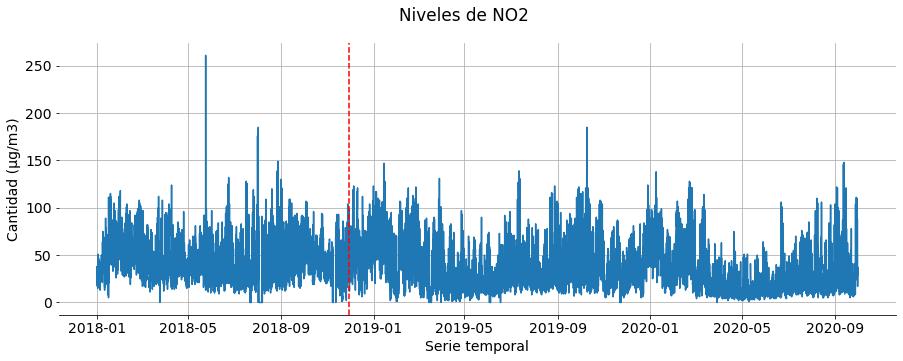

In [21]:
# Plot
# Vuestro código va a aquí....

fig, ax = plt.subplots(figsize=(15, 5))
fig.suptitle('Niveles de NO2')

## Etiquetamos los ejes.
ax.set_xlabel('Serie temporal')
ax.set_ylabel('Cantidad (µg/m3)')
## Mostramos la cuadricula.
ax.grid(True)

## Ocultamos el marco.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.plot(df_magnitudes['NO2'])
kw ={'ls':'--'}
plt.axvline(x='2018-11-30', color='red',**kw)


### Segundo plot: medición de la diferencia

Esto no nos deja del todo bien observar si hay un impacto real... Vamos a plotear la diferencia punto a punto entre 2018, 2019 y 2020. Para ello vamos a realizar una serie de acciones:

**Resamplea los datos a frecuencia diaria, agregando con la media y haz un plot con una moving average de un año para observar la tendencia del NO2**

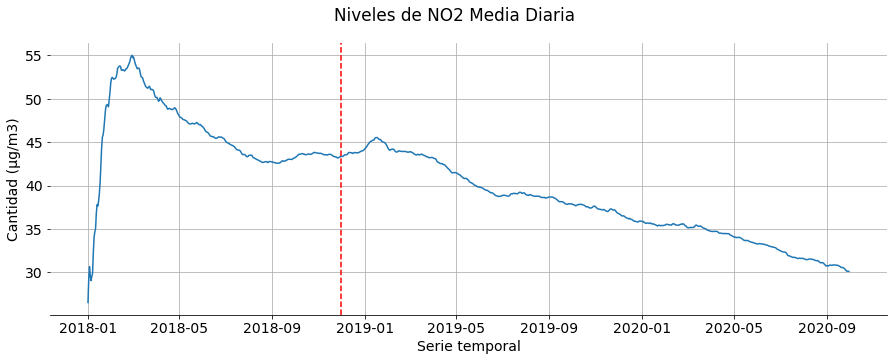

In [22]:
# Se realiza el resample con parámetro 'D' ya que es el que nos indica que la frecuencia sea diaria.
# Seleccionamos la columna NO2 ya que es la que queremos estudiar y realizamos la media daria.
# Por ultimo hacemos una moving con la media en una ventana de 1 año (365 días)

s_magnitudes_x_dia_NO2=df_magnitudes.resample('D')['NO2'].mean().rolling(365, min_periods=1).mean()

fig, ax = plt.subplots(figsize=(15, 5))
fig.suptitle('Niveles de NO2 Media Diaria')

## Etiquetamos los ejes.
ax.set_xlabel('Serie temporal')
ax.set_ylabel('Cantidad (µg/m3)')
## Mostramos la cuadricula.
ax.grid(True)

## Ocultamos el marco.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.plot(s_magnitudes_x_dia_NO2)
kw ={'ls':'--'}
plt.axvline(x='2018-11-30', color='red',**kw)

**Calcula diferencia de niveles de NO2 para cada día con respecto al año anterior.** Pista: usa la función shift de pandas


In [23]:
#Hacemos un shift de 365 días hacia "abajo", para poner al mismo nivel los valores de 2019 con los de 2018.
# Este sería el valor de 2018-01-01
s_magnitudes_x_dia_NO2['2018-01-01']

26.541666666666668

In [24]:
# Este sería el valor de 2018-01-01
s_magnitudes_x_dia_NO2['2019-01-01']

44.247678737233066

In [25]:
# Este sería el valor desplazado 365 días del 2018-01-01,
# para que podamos hacer la resta entre el mismo día de 2019 y 2018
s_magnitudes_x_dia_NO2.shift(365)['2019-01-01']

26.541666666666668

In [26]:
# Hacemos la operacion para calcular la diferencia diaria entre los dias 2018 con 2019 y 2019 con 2020
s_magnitudes_x_dia_diff_NO2 = s_magnitudes_x_dia_NO2-s_magnitudes_x_dia_NO2.shift(365)
s_magnitudes_x_dia_diff_NO2 = s_magnitudes_x_dia_diff_NO2.dropna()
s_magnitudes_x_dia_diff_NO2['2019-01-01']

17.7060120705664

**Plotea el resultado tal cual, y suavizado.** ¿Cuál es tu conclusión?

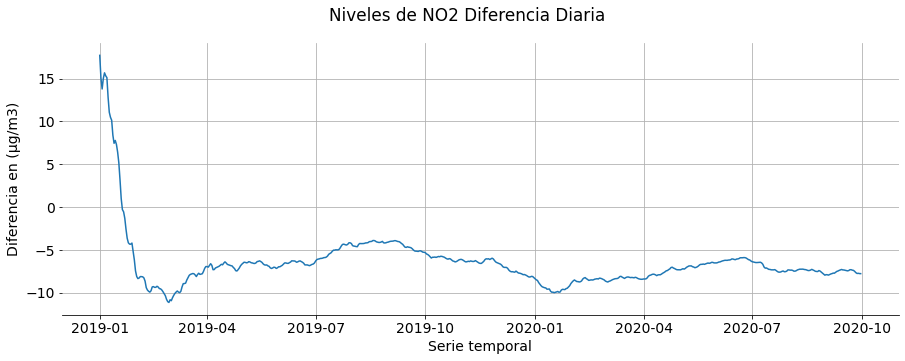

In [27]:
# Hacemos el plot tal cual

fig, ax = plt.subplots(figsize=(15, 5))
fig.suptitle('Niveles de NO2 Diferencia Diaria')

## Etiquetamos los ejes.
ax.set_xlabel('Serie temporal')
ax.set_ylabel('Diferencia en (µg/m3)')

## Mostramos la cuadricula.
ax.grid(True)

## Ocultamos el marco.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.plot(s_magnitudes_x_dia_diff_NO2)


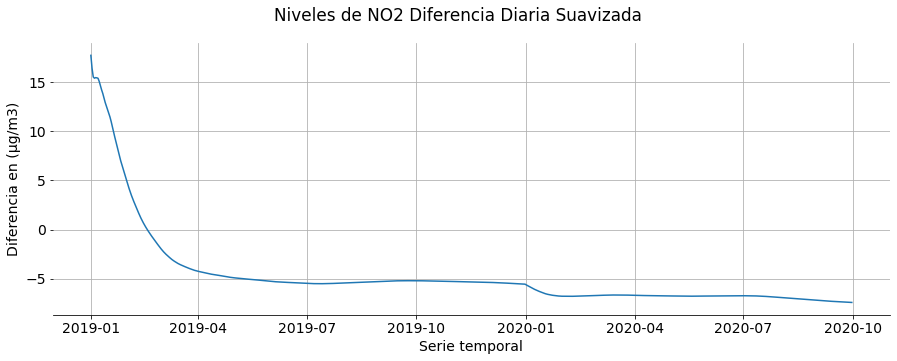

In [28]:
#Hacemos el plot suavizado
#s_magnitudes_x_dia_diff_NO2.rolling(365, min_periods=1).mean().plot(figsize=(16, 6))
# plt.axvline(x='2018-11-30', color='red')

#Hacemos el plot suavizado

fig, ax = plt.subplots(figsize=(15, 5))
fig.suptitle('Niveles de NO2 Diferencia Diaria Suavizada')

## Etiquetamos los ejes.
ax.set_xlabel('Serie temporal')
ax.set_ylabel('Diferencia en (µg/m3)')

## Mostramos la cuadricula.
ax.grid(True)

## Ocultamos el marco.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.plot(s_magnitudes_x_dia_diff_NO2.rolling(365, min_periods=1).mean())

* La conclusión una vez observadas las mediciones y los gráficos por diferencias es que la caida de los niveles de NO2 apartir del del 2019 es muy notable llegando a bajadas de los niveles de entre entre 5 y 10 µg/m3 

**¿Ha habido un descenso a nivel anual en la emisión media de los gases CO, NO, NO2 y NOx entre los años 2018 y 2019?.** 

In [29]:
# Mostramos la tendencia de los 4 gases durante 2018,2019 y 2020.
# suavizamos la gráfica con una ventana de 365 calculando la media
df_magnitudes_x_anio_Todos=df_magnitudes.resample('Y')['CO', 'NO', 'NO2','NOx'].mean()
df_magnitudes_x_anio_Todos

MAGNITUD,CO,NO,NO2,NOx
TIMESTAMP,,,,
2018-12-31,0.487926,20.235608,44.140552,74.867224
2019-12-31,0.452066,17.742998,35.899908,63.019972
2020-12-31,0.369039,11.659519,27.279045,44.959094


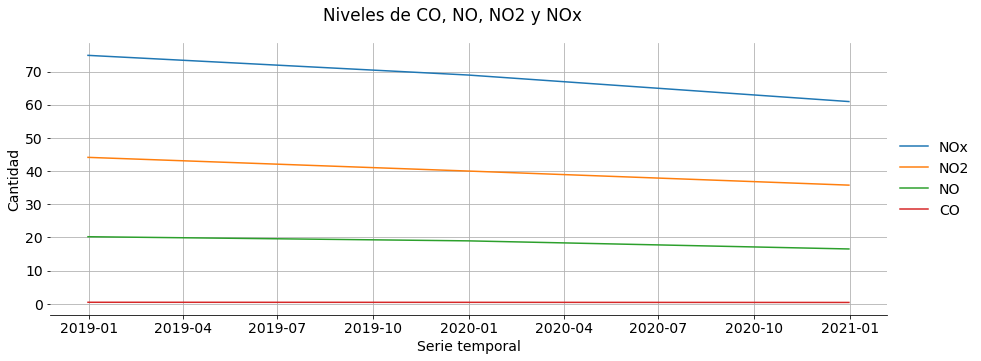

In [30]:
# Generamos la gráfica

fig, ax = plt.subplots(figsize=(15, 5))
fig.suptitle('Niveles de CO, NO, NO2 y NOx ')

## Etiquetamos los ejes.
ax.set_xlabel('Serie temporal')
ax.set_ylabel('Cantidad')

## Mostramos la cuadricula.
ax.grid(True)

## Ocultamos el marco.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

magnitudes= ['NOx','NO2','NO','CO']
for magnitud in magnitudes:
        #ax.plot(months, month_country_temperature[country], label=country)
        ax.plot(df_magnitudes_x_anio_Todos[magnitud].rolling(365, min_periods=1).mean(),label=magnitud)
        
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

**Esta variación puede deberse a un aumento/disminución de las precipitaciones entre esos dos años. Para ello disponemos de las precipitaciones a lo largo de los años 2018 y 2019 en Madrid. ¿Explica el comportamiento anual de las precipicationes la variación en los niveles de gases o podemos atribuir dicho efecto a la implementación de Madrid central?**

In [31]:
clima=pd.read_excel('histórico-clima.xlsx')

In [32]:
# Visualizamos información acerca de la información del clima en Madrid
clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   timestamp                   4748 non-null   datetime64[ns]
 1   Madrid Precipitation Total  4748 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 74.3 KB


In [33]:
# Vemos que aspecto tienen los registros
clima.tail(10)

,timestamp,Madrid Precipitation Total
4738,2019-12-22,0.0
4739,2019-12-23,0.0
4740,2019-12-24,0.0
4741,2019-12-25,0.0
4742,2019-12-26,0.0
4743,2019-12-27,0.0
4744,2019-12-28,0.0
4745,2019-12-29,0.0
4746,2019-12-30,0.0
4747,2019-12-31,0.0


In [34]:
# Como vemos que existe una columna 'timestamp' que refleja la medición del día.
# Pasamos esta columna como indice de cara a facilitarnos futuras operaciones
clima.set_index('timestamp', drop=True,inplace=True)

In [35]:
clima

,Madrid Precipitation Total
timestamp,
2007-01-01,0.0
2007-01-02,0.0
2007-01-03,0.0
2007-01-04,0.0
2007-01-05,0.0
...,...
2019-12-27,0.0
2019-12-28,0.0
2019-12-29,0.0


In [36]:
# Vamos a combinar en un mismo df las medidas de precipitación por día y la de los 5 gases contaminates
# que estamos analizando.
# Para ello, primero,vamos a hacer un resample por día de las magnitudes (gases) con su media.

df_magnitudes_x_dia_Todos=df_magnitudes.resample('D')['CO', 'NO', 'NO2','NOx'].mean()
df_magnitudes_x_dia_Todos

MAGNITUD,CO,NO,NO2,NOx
TIMESTAMP,,,,
2018-01-01,0.366667,3.000000,26.541667,31.083333
2018-01-02,0.562500,5.041667,32.083333,39.875000
2018-01-03,0.408333,10.833333,33.375000,49.791667
2018-01-04,0.100000,5.416667,26.333333,34.708333
2018-01-05,0.100000,3.333333,26.958333,32.000000
...,...,...,...,...
2020-09-26,0.287500,3.625000,18.916667,24.416667
2020-09-27,0.300000,2.833333,13.416667,17.750000
2020-09-28,0.541667,17.041667,48.333333,74.458333


In [37]:
# Realizamos el join para tener en un mismo df tanto las medciones de los gases como la de precipitación
df_magnitudes_x_clima=pd.merge(df_magnitudes_x_dia_Todos,clima, how='inner', left_index=True, right_index=True)

In [38]:
df_magnitudes_x_clima

,CO,NO,NO2,NOx,Madrid Precipitation Total
2018-01-01,0.366667,3.000000,26.541667,31.083333,0.0
2018-01-02,0.562500,5.041667,32.083333,39.875000,0.0
2018-01-03,0.408333,10.833333,33.375000,49.791667,0.0
2018-01-04,0.100000,5.416667,26.333333,34.708333,0.0
2018-01-05,0.100000,3.333333,26.958333,32.000000,4.4
...,...,...,...,...,...
2019-12-27,0.587500,57.125000,61.000000,148.583333,0.0
2019-12-28,0.862500,99.750000,73.875000,226.958333,0.0
2019-12-29,0.770833,78.625000,67.750000,188.125000,0.0
2019-12-30,0.695833,78.583333,61.666667,182.333333,0.0


[Text(0, 0.5, 'CO'),
 Text(0, 1.5, 'NO'),
 Text(0, 2.5, 'NO2'),
 Text(0, 3.5, 'NOx'),
 Text(0, 4.5, 'Madrid Precipitation Total')]

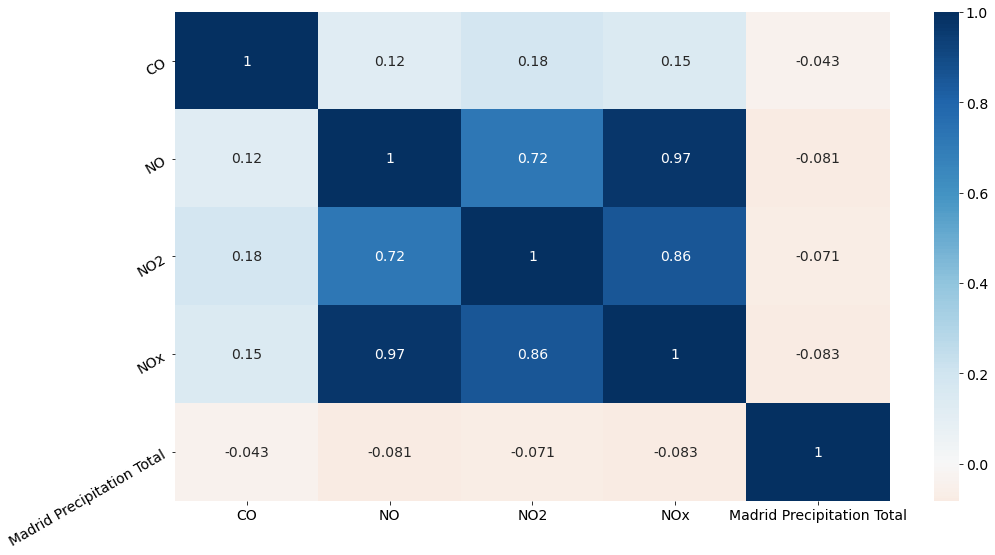

In [39]:
# Ahora que tenemos todos los datos en el mismo df y en la misma medición diaria, vamos a ver si por los datos recogidos
# exsite algún tipo de correlación entre las variables, para en caso de exixtir intentar crear un modelo que explique
# este comportamiento.
# Calculamos los coeficientes de Pearson.

ax = sb.heatmap(df_magnitudes_x_clima.corr(), annot=True, center=0, cmap="RdBu")
ax.set_yticklabels(df_magnitudes_x_clima.columns, rotation=30, ha='right')

* Como vemos todos los coeficientes entre la variable de las Precipitaciones de Madrid y la de los 4 gases contaminates son valores muy bajos por lo que apenas existe correlación entre ellas. 
* Lo único reseñable que podemos observar es que esta leve correlación siempre es negativa por lo que indica que cuando unas crecen, cuando llueve, las otras decrecen, pero de forma muy leve.
* En resumen no se aprecia correlación entre la variable de Precipitaciones y la de los gases.

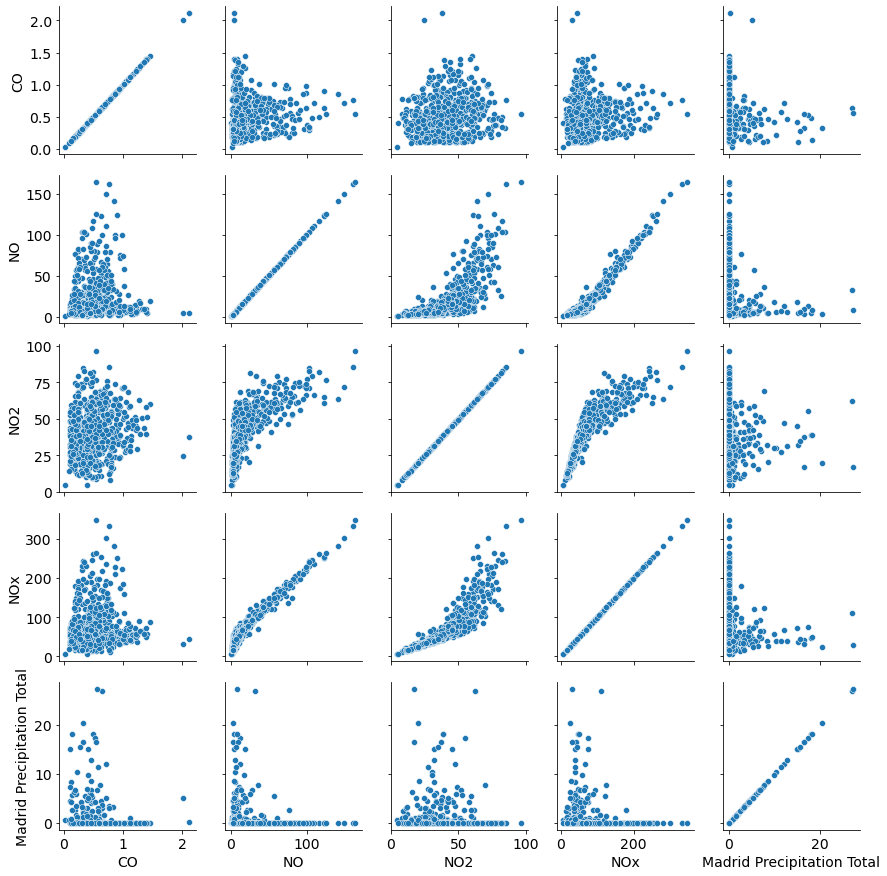

In [40]:
#Se realiza el diagrama de dispersión para tener una idea de como se posicionan gráficamamente 
# el comportamiento de las variables de los gases con respecto a las precipitaciones
g = sb.PairGrid(df_magnitudes_x_clima, palette='hls')
g.map(sb.scatterplot)

* **CONCLUSIÓN :**
    * Haciendo una evaluación de las variables de los gases contaminantes CO,NO,NO2,NOx con las precipitaciones anulales de Madrid se puede concluir que **no han influido las condiciones climáticas en la bajada de los niveles de contaminación**. 
    * Muy probalmente esta bajada de los niveles de los gases contaminantes CO,NO,NO2,NOx **se haya debido a la puesta en marcha de Madrid Central**

Podéis encontrar el paper con el estudio real aquí:

https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3495440